# Rank of Binary Random Matrix
This code is provided as supplementary material of the lecture Channel Coding - Graph Based Codes (CC-GBC)

This code illustrates

Rank of random parity-check matrix

In [60]:
import numpy as np
import galois
from tqdm.notebook import tqdm

In [61]:
# size of matrix
m = 10
n = 20

# construct random matrix
H = np.random.randint(0, 2, (m,n))
GF2 = galois.GF(2)
H_gf = GF2(H)

# show rank and maximum possible rank
print(f"Rand of matrix is {np.linalg.matrix_rank(H_gf)} (maximum rank: {np.min([m,n])})\n")

Rand of matrix is 10 (maximum rank: 10)



In the following, we estimate the probability that a matrix of size $m\times n$ is of full rank. We do so by Monte-Carlo estimation and count the number of matrices of full rank divided by the number of matrices that we generated.

In [65]:
def probability_full_rank(m,n, trials=1000):
    full_rank_count = 0
    for i in range(trials):
        H = np.random.randint(0, 2, (m,n))
        if np.linalg.matrix_rank(GF2(H)) == np.min([m,n]):
            full_rank_count += 1
    
    return full_rank_count / trials

Check for a range of different sizes

In [66]:
rate = 1/2

m_range = np.arange(2,44,2)
p = np.zeros_like(m_range, dtype=float)
for j,m in enumerate(tqdm(m_range)):
    p[j] = probability_full_rank(m, int(m/rate))

  0%|          | 0/21 [00:00<?, ?it/s]

Plot the results

In [57]:
import matplotlib.pyplot as plt
import matplotlib
import shutil

font = {'size'   : 14}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)
matplotlib.rc('figure', figsize=(7, 4) )
plt.rc('text.latex', preamble=r'\usepackage{amsmath}\usepackage{amssymb}\usepackage{bm}')

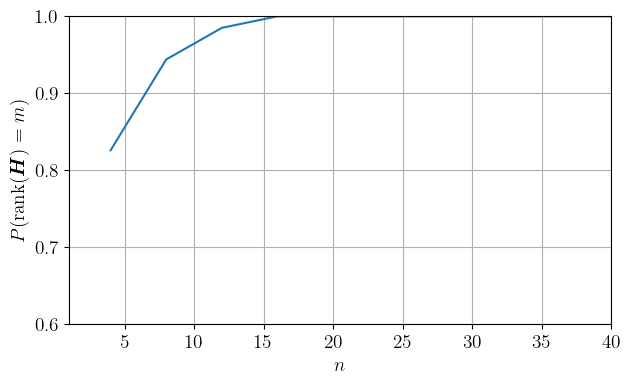

In [67]:
plt.figure(1)
plt.plot(m_range/rate, p)
plt.xlim(1, 40)
plt.ylim(0.6, 1)
plt.xlabel(r'$n$')
plt.ylabel(r'$P(\mathrm{rank}(\bm{H})=m)$') 
plt.grid()
plt.show()